# Chicago Crime Analyzer

Your primary objective in this role is to leverage historical and recent crime data to identify patterns, trends, and hotspots within Chicago. By conducting a thorough analysis of this data, you will support strategic decision-making, improve resource allocation, and contribute to reducing crime rates and enhancing public safety. Your task is to provide actionable insights that can shape our crime prevention strategies, ensuring a safer and more secure community. This project will be instrumental in aiding law enforcement operations and enhancing the overall effectiveness of our efforts in combating crime in Chicago.

# 1. Import Libraries

In [143]:
#[Data Manipulation]
import pandas as pd
import geopandas as gpd

#[Data visualization]
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.express import bar
import folium

#[Model]
import sklearn



# 2. Load Dataset

In [90]:
# Add sample dataset
df1 = pd.read_csv("Data/Sample Crime Dataset.xlsx - Sheet1.csv")
df1

ID Case Number           Date                      Block  IUCR  \
0     5741943    HN549294   8/25/07 9:22         074XX N ROGERS AVE   560   
1       25953    JE240540  5/24/21 15:06        020XX N LARAMIE AVE   110   
2       26038    JE279849   6/26/21 9:24      062XX N MC CORMICK RD   110   
3    13279676    JG507211   11/9/23 7:30           019XX W BYRON ST   620   
4    13274752    JG501049  11/12/23 7:59  086XX S COTTAGE GROVE AVE   454   
..        ...         ...            ...                        ...   ...   
994  13203421    JG415540   9/7/23 20:24         013XX S WABASH AVE   820   
995  13202672    JG414584    9/7/23 0:01        071XX S LANGLEY AVE   910   
996  13204410    JG416803   9/7/23 13:34            007XX W 72ND ST  1130   
997  13204809    JG415669   9/7/23 20:30        083XX S BRANDON AVE   486   
998  13208800    JG411427    9/5/23 2:44   067XX S STONY ISLAND AVE  1310   

            Primary Type                                        Description  \
0                ASSAULT                                             SIMPLE   
1               HOMICIDE                                FIRST DEGREE MURDER   
2               HOMICIDE                                FIRST DEGREE MURDER   
3               BURGLARY                                     UNLAWFUL ENTRY   
4                BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
..                   ...                                                ...   
994                THEFT                                     $500 AND UNDER   
995  MOTOR VEHICLE THEFT                                         AUTOMOBILE   
996   DECEPTIVE PRACTICE                           FRAUD OR CONFIDENCE GAME   
997              BATTERY                            DOMESTIC BATTERY SIMPLE   
998      CRIMINAL DAMAGE                                        TO PROPERTY   

    Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0                  OTHER   False     False  ...  49.0             1.0   
1                 STREET    True     False  ...  36.0            19.0   
2            PARKING LOT    True     False  ...  50.0            13.0   
3              APARTMENT   False     False  ...  47.0             5.0   
4     SMALL RETAIL STORE    True     False  ...   6.0            44.0   
..                   ...     ...       ...  ...   ...             ...   
994                ALLEY   False     False  ...   3.0            33.0   
995               STREET   False     False  ...   6.0            69.0   
996            RESIDENCE   False     False  ...   6.0            68.0   
997            APARTMENT   False      True  ...  10.0            46.0   
998           RESTAURANT   False     False  ...   5.0            43.0   

     FBI Code  X Coordinate Y Coordinate  Year      Updated On   Latitude  \
0         08A           NaN          NaN  2007   8/17/15 15:03        NaN   
1         01A     1141387.0    1913179.0  2021  11/18/23 15:39  41.917838   
2         01A     1152781.0    1941458.0  2021  11/18/23 15:39  41.995219   
3           5     1162518.0    1925906.0  2023  11/18/23 15:39  41.952345   
4         08B     1183071.0    1847869.0  2023   12/9/23 15:41  41.737751   
..        ...           ...          ...   ...             ...        ...   
994         6     1176976.0    1894313.0  2023   9/15/23 15:42  41.865337   
995         7     1182132.0    1857805.0  2023   9/15/23 15:42  41.765038   
996        11     1172423.0    1857127.0  2023   9/15/23 15:42  41.763397   
997       08B     1198930.0    1850326.0  2023   9/15/23 15:42  41.744110   
998        14     1188026.0    1860655.0  2023   9/15/23 15:41  41.772720   

     Longitude                       Location  
0          NaN                            NaN  
1   -87.755969  (41.917838056, -87.755968972)  
2   -87.713355  (41.995219444, -87.713354912)  
3   -87.677975  (41.952345086, -87.677975059)  
4   -87.604856  (41.737750767, -87.604855911)  
..         ...                            ...  

| Field | Description |
|---|---|
| ID | Unique identifier for each crime incident. |
| Case Number | Unique case number assigned to each incident. |
| Date | Date and time when the crime occurred. |
| Block | Block where the crime occurred. |
| IUCR | Illinois Uniform Crime Reporting code assigned to the crime type. |
| Primary Type | Primary classification of the crime. |
| Description | Detailed description of the crime. |
| Location Description | Description of the location where the crime occurred. |
| Arrest | Indicates whether an arrest was made (TRUE/FALSE). |
| Domestic | Indicates whether the crime was domestic-related (TRUE/FALSE). |
| Beat | Police beat where the crime occurred. |
| District | Police district where the crime occurred. |
| Ward | Ward where the crime occurred. |
| Community Area | Community area where the crime occurred. |
| FBI Code | FBI code classification for the crime. |
| X Coordinate | X coordinate of the crime location. |
| Y Coordinate | Y coordinate of the crime location. |
| Year | Year when the crime was reported. |
| Updated On | Date when the record was last updated. |
| Latitude | Latitude of the crime location. |
| Longitude | Longitude of the crime location. |
| Location | Combined latitude and longitude in a string format. |


# 3. Data Summary

In [91]:
df1.shape

(999, 22)

In [92]:
df1.describe()

ID         Beat    District        Ward  Community Area  \
count  9.990000e+02   999.000000  999.000000  998.000000      998.000000   
mean   1.309186e+07  1153.694695   11.309309   22.831663       36.333667   
std    1.043920e+06   725.310999    7.254839   14.324360       21.680406   
min    2.595300e+04   111.000000    1.000000    1.000000        1.000000   
25%    1.320166e+07   517.500000    5.000000    9.000000       21.000000   
50%    1.320229e+07  1111.000000   11.000000   21.000000       32.000000   
75%    1.320373e+07  1731.000000   17.000000   34.000000       53.000000   
max    1.328014e+07  2534.000000   25.000000   50.000000       77.000000   

       X Coordinate  Y Coordinate         Year    Latitude   Longitude  
count  9.790000e+02  9.790000e+02   999.000000  979.000000  979.000000  
mean   1.165592e+06  1.887908e+06  2022.800801   41.847994  -87.667807  
std    1.650861e+04  3.294080e+04     1.386074    0.090599    0.060040  
min    1.100658e+06  1.815536e+06  2002.000000   41.648589  -87.905227  
25%    1.153686e+06  1.858258e+06  2023.000000   41.766339  -87.710902  
50%    1.166921e+06  1.894632e+06  2023.000000   41.866686  -87.663427  
75%    1.176960e+06  1.913084e+06  2023.000000   41.917535  -87.626153  
max    1.203499e+06  1.950688e+06  2023.000000   42.020296  -87.530451

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    999 non-null    int64  
 1   Case Number           999 non-null    object 
 2   Date                  999 non-null    object 
 3   Block                 999 non-null    object 
 4   IUCR                  999 non-null    object 
 5   Primary Type          999 non-null    object 
 6   Description           999 non-null    object 
 7   Location Description  997 non-null    object 
 8   Arrest                999 non-null    bool   
 9   Domestic              999 non-null    bool   
 10  Beat                  999 non-null    int64  
 11  District              999 non-null    int64  
 12  Ward                  998 non-null    float64
 13  Community Area        998 non-null    float64
 14  FBI Code              999 non-null    object 
 15  X Coordinate          9

In [94]:
df1.isnull().sum()

ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     2
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     1
Community Area           1
FBI Code                 0
X Coordinate            20
Y Coordinate            20
Year                     0
Updated On               0
Latitude                20
Longitude               20
Location                20
dtype: int64

In [95]:
df1.duplicated().sum()

0

**Inference**
- The dataset consists of *999* records and *22* features.
- The dataset is available from the year 2002 to 2023.
- There are negligible missing values of about 20 records in loaction coordinates.
- The loaction coordinates are given in GCS and PCS.
- There is no duplicates in the dataset.
- The datatypes seen are 'int64, float64, object, bool'. 
- The numerical features includes:
    - ID, Beat, Community Area, X Coordinate, Y Coordinate, Year, Latitude, Longitude
- The categorical features includes:
    - Case Number, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, District, Ward, FBI Code
- Datatime features includes:
    - Data, Updated On

# 4. Data Preparation

## 4.1 Missing Values

In [96]:
df2 = df1.copy()

df2 = df2.dropna()
df2

ID Case Number           Date                      Block  IUCR  \
1       25953    JE240540  5/24/21 15:06        020XX N LARAMIE AVE   110   
2       26038    JE279849   6/26/21 9:24      062XX N MC CORMICK RD   110   
3    13279676    JG507211   11/9/23 7:30           019XX W BYRON ST   620   
4    13274752    JG501049  11/12/23 7:59  086XX S COTTAGE GROVE AVE   454   
6    13203321    JG415333   9/6/23 17:00           002XX N Wells st  1320   
..        ...         ...            ...                        ...   ...   
994  13203421    JG415540   9/7/23 20:24         013XX S WABASH AVE   820   
995  13202672    JG414584    9/7/23 0:01        071XX S LANGLEY AVE   910   
996  13204410    JG416803   9/7/23 13:34            007XX W 72ND ST  1130   
997  13204809    JG415669   9/7/23 20:30        083XX S BRANDON AVE   486   
998  13208800    JG411427    9/5/23 2:44   067XX S STONY ISLAND AVE  1310   

            Primary Type                                        Description  \
1               HOMICIDE                                FIRST DEGREE MURDER   
2               HOMICIDE                                FIRST DEGREE MURDER   
3               BURGLARY                                     UNLAWFUL ENTRY   
4                BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
6        CRIMINAL DAMAGE                                         TO VEHICLE   
..                   ...                                                ...   
994                THEFT                                     $500 AND UNDER   
995  MOTOR VEHICLE THEFT                                         AUTOMOBILE   
996   DECEPTIVE PRACTICE                           FRAUD OR CONFIDENCE GAME   
997              BATTERY                            DOMESTIC BATTERY SIMPLE   
998      CRIMINAL DAMAGE                                        TO PROPERTY   

                       Location Description  Arrest  Domestic  ...  Ward  \
1                                    STREET    True     False  ...  36.0   
2                               PARKING LOT    True     False  ...  50.0   
3                                 APARTMENT   False     False  ...  47.0   
4                        SMALL RETAIL STORE    True     False  ...   6.0   
6    PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...  42.0   
..                                      ...     ...       ...  ...   ...   
994                                   ALLEY   False     False  ...   3.0   
995                                  STREET   False     False  ...   6.0   
996                               RESIDENCE   False     False  ...   6.0   
997                               APARTMENT   False      True  ...  10.0   
998                              RESTAURANT   False     False  ...   5.0   

     Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
1              19.0       01A     1141387.0    1913179.0  2021   
2              13.0       01A     1152781.0    1941458.0  2021   
3               5.0         5     1162518.0    1925906.0  2023   
4              44.0       08B     1183071.0    1847869.0  2023   
6              32.0        14     1174694.0    1901831.0  2023   
..              ...       ...           ...          ...   ...   
994            33.0         6     1176976.0    1894313.0  2023   
995            69.0         7     1182132.0    1857805.0  2023   
996            68.0        11     1172423.0    1857127.0  2023   
997            46.0       08B     1198930.0    1850326.0  2023   
998            43.0        14     1188026.0    1860655.0  2023   

         Updated On   Latitude  Longitude                       Location  
1    11/18/23 15:39  41.917838 -87.755969  (41.917838056, -87.755968972)  
2    11/18/23 15:39  41.995219 -87.713355  (41.995219444, -87.713354912)  
3    11/18/23 15:39  41.952345 -87.677975  (41.952345086, -87.677975059)  
4     12/9/23 15:41  41.737751 -87.604856  (41.737750767, -87.604855911)  
6     11/4/23 15:40  41.886018 -87.633938  (41.886018055

In [97]:
df2.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

The missing values which cannot be filled are dropped from the dataset. Now, 977 records and 22 features are available.

## 4.2 Correct Date Format

In [98]:
df1.head()

ID Case Number           Date                      Block IUCR  \
0   5741943    HN549294   8/25/07 9:22         074XX N ROGERS AVE  560   
1     25953    JE240540  5/24/21 15:06        020XX N LARAMIE AVE  110   
2     26038    JE279849   6/26/21 9:24      062XX N MC CORMICK RD  110   
3  13279676    JG507211   11/9/23 7:30           019XX W BYRON ST  620   
4  13274752    JG501049  11/12/23 7:59  086XX S COTTAGE GROVE AVE  454   

  Primary Type                                        Description  \
0      ASSAULT                                             SIMPLE   
1     HOMICIDE                                FIRST DEGREE MURDER   
2     HOMICIDE                                FIRST DEGREE MURDER   
3     BURGLARY                                     UNLAWFUL ENTRY   
4      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                OTHER   False     False  ...  49.0             1.0       08A   
1               STREET    True     False  ...  36.0            19.0       01A   
2          PARKING LOT    True     False  ...  50.0            13.0       01A   
3            APARTMENT   False     False  ...  47.0             5.0         5   
4   SMALL RETAIL STORE    True     False  ...   6.0            44.0       08B   

   X Coordinate Y Coordinate  Year      Updated On   Latitude  Longitude  \
0           NaN          NaN  2007   8/17/15 15:03        NaN        NaN   
1     1141387.0    1913179.0  2021  11/18/23 15:39  41.917838 -87.755969   
2     1152781.0    1941458.0  2021  11/18/23 15:39  41.995219 -87.713355   
3     1162518.0    1925906.0  2023  11/18/23 15:39  41.952345 -87.677975   
4     1183071.0    1847869.0  2023   12/9/23 15:41  41.737751 -87.604856   

                        Location  
0                            NaN  
1  (41.917838056, -87.755968972)  
2  (41.995219444, -87.713354912)  
3  (41.952345086, -87.677975059)  
4  (41.737750767, -87.604855911)  

[5 rows x 22 columns]

In [99]:
df2["Date"] = df2['Date'].apply(lambda x: x.replace('/', '-'))
df2["Updated On"] = df2['Updated On'].apply(lambda x: x.replace('/', '-'))
df2.head()

ID Case Number           Date                      Block  IUCR  \
1     25953    JE240540  5-24-21 15:06        020XX N LARAMIE AVE   110   
2     26038    JE279849   6-26-21 9:24      062XX N MC CORMICK RD   110   
3  13279676    JG507211   11-9-23 7:30           019XX W BYRON ST   620   
4  13274752    JG501049  11-12-23 7:59  086XX S COTTAGE GROVE AVE   454   
6  13203321    JG415333   9-6-23 17:00           002XX N Wells st  1320   

      Primary Type                                        Description  \
1         HOMICIDE                                FIRST DEGREE MURDER   
2         HOMICIDE                                FIRST DEGREE MURDER   
3         BURGLARY                                     UNLAWFUL ENTRY   
4          BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
6  CRIMINAL DAMAGE                                         TO VEHICLE   

                     Location Description  Arrest  Domestic  ...  Ward  \
1                                  STREET    True     False  ...  36.0   
2                             PARKING LOT    True     False  ...  50.0   
3                               APARTMENT   False     False  ...  47.0   
4                      SMALL RETAIL STORE    True     False  ...   6.0   
6  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...  42.0   

   Community Area  FBI Code  X Coordinate Y Coordinate  Year      Updated On  \
1            19.0       01A     1141387.0    1913179.0  2021  11-18-23 15:39   
2            13.0       01A     1152781.0    1941458.0  2021  11-18-23 15:39   
3             5.0         5     1162518.0    1925906.0  2023  11-18-23 15:39   
4            44.0       08B     1183071.0    1847869.0  2023   12-9-23 15:41   
6            32.0        14     1174694.0    1901831.0  2023   11-4-23 15:40   

    Latitude  Longitude                       Location  
1  41.917838 -87.755969  (41.917838056, -87.755968972)  
2  41.995219 -87.713355  (41.995219444, -87.713354912)  
3  41.952345 -87.677975  (41.952345086, -87.677975059)  
4  41.737751 -87.604856  (41.737750767, -87.604855911)  
6  41.886018 -87.633938  (41.886018055, -87.633937881)  

[5 rows x 22 columns]

In [100]:
df2[['Date', 'Time']] = df2['Date'].str.split(' ', expand=True)
df2[['Updated On Date', 'Updated On Time']] = df2['Updated On'].str.split(' ', expand=True)
df2.head()

ID Case Number      Date                      Block  IUCR  \
1     25953    JE240540   5-24-21        020XX N LARAMIE AVE   110   
2     26038    JE279849   6-26-21      062XX N MC CORMICK RD   110   
3  13279676    JG507211   11-9-23           019XX W BYRON ST   620   
4  13274752    JG501049  11-12-23  086XX S COTTAGE GROVE AVE   454   
6  13203321    JG415333    9-6-23           002XX N Wells st  1320   

      Primary Type                                        Description  \
1         HOMICIDE                                FIRST DEGREE MURDER   
2         HOMICIDE                                FIRST DEGREE MURDER   
3         BURGLARY                                     UNLAWFUL ENTRY   
4          BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
6  CRIMINAL DAMAGE                                         TO VEHICLE   

                     Location Description  Arrest  Domestic  ...  \
1                                  STREET    True     False  ...   
2                             PARKING LOT    True     False  ...   
3                               APARTMENT   False     False  ...   
4                      SMALL RETAIL STORE    True     False  ...   
6  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...   

   X Coordinate  Y Coordinate  Year      Updated On   Latitude  Longitude  \
1     1141387.0     1913179.0  2021  11-18-23 15:39  41.917838 -87.755969   
2     1152781.0     1941458.0  2021  11-18-23 15:39  41.995219 -87.713355   
3     1162518.0     1925906.0  2023  11-18-23 15:39  41.952345 -87.677975   
4     1183071.0     1847869.0  2023   12-9-23 15:41  41.737751 -87.604856   
6     1174694.0     1901831.0  2023   11-4-23 15:40  41.886018 -87.633938   

                        Location   Time Updated On Date  Updated On Time  
1  (41.917838056, -87.755968972)  15:06        11-18-23            15:39  
2  (41.995219444, -87.713354912)   9:24        11-18-23            15:39  
3  (41.952345086, -87.677975059)   7:30        11-18-23            15:39  
4  (41.737750767, -87.604855911)   7:59         12-9-23            15:41  
6  (41.886018055, -87.633937881)  17:00         11-4-23            15:40  

[5 rows x 25 columns]

In [101]:
# Split the Date column
df2[['Month', 'Day', 'Year']] = df2['Date'].str.split('-', expand=True).astype(int)
df2.head()

ID Case Number      Date                      Block  IUCR  \
1     25953    JE240540   5-24-21        020XX N LARAMIE AVE   110   
2     26038    JE279849   6-26-21      062XX N MC CORMICK RD   110   
3  13279676    JG507211   11-9-23           019XX W BYRON ST   620   
4  13274752    JG501049  11-12-23  086XX S COTTAGE GROVE AVE   454   
6  13203321    JG415333    9-6-23           002XX N Wells st  1320   

      Primary Type                                        Description  \
1         HOMICIDE                                FIRST DEGREE MURDER   
2         HOMICIDE                                FIRST DEGREE MURDER   
3         BURGLARY                                     UNLAWFUL ENTRY   
4          BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
6  CRIMINAL DAMAGE                                         TO VEHICLE   

                     Location Description  Arrest  Domestic  ...  Year  \
1                                  STREET    True     False  ...    21   
2                             PARKING LOT    True     False  ...    21   
3                               APARTMENT   False     False  ...    23   
4                      SMALL RETAIL STORE    True     False  ...    23   
6  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...    23   

       Updated On   Latitude  Longitude                       Location   Time  \
1  11-18-23 15:39  41.917838 -87.755969  (41.917838056, -87.755968972)  15:06   
2  11-18-23 15:39  41.995219 -87.713355  (41.995219444, -87.713354912)   9:24   
3  11-18-23 15:39  41.952345 -87.677975  (41.952345086, -87.677975059)   7:30   
4   12-9-23 15:41  41.737751 -87.604856  (41.737750767, -87.604855911)   7:59   
6   11-4-23 15:40  41.886018 -87.633938  (41.886018055, -87.633937881)  17:00   

   Updated On Date  Updated On Time Month  Day  
1         11-18-23            15:39     5   24  
2         11-18-23            15:39     6   26  
3         11-18-23            15:39    11    9  
4          12-9-23            15:41    11   12  
6          11-4-23            15:40     9    6  

[5 rows x 27 columns]

In [102]:
len(df2["ID"].unique())

977

In [103]:
len(df2["Case Number"].unique())

977

In [104]:
df2["Year"].unique()

array([21, 23, 19, 20, 22, 18, 10])

# 5. Insights

## 5.1 Temporal Analysis

In [105]:
df2.groupby(['Year'])['Case Number'].count()

Year
10      1
18      1
19      4
20      1
21      4
22     17
23    949
Name: Case Number, dtype: int64

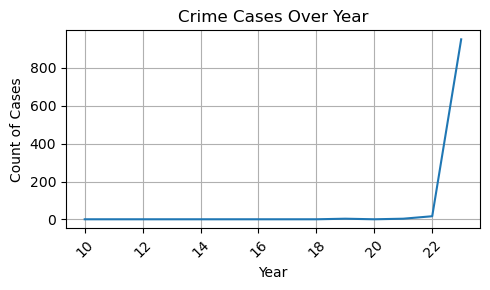

In [106]:
# Trend over time
# year
case_count = df2.groupby(['Year'])['Case Number'].count()

plt.figure(figsize=(5,3))
plt.plot(case_count)
plt.xlabel('Year')
plt.ylabel('Count of Cases')
plt.title('Crime Cases Over Year') 
plt.xticks(rotation=45)
plt.grid(True) 
plt.tight_layout() 
plt.show()

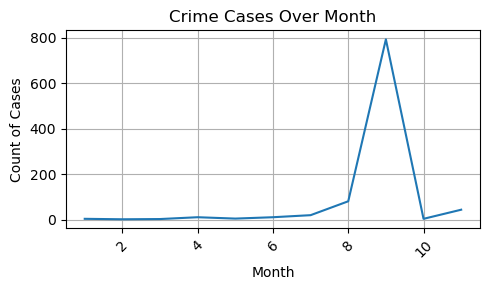

In [107]:
# month
case_count = df2.groupby(['Month'])['Case Number'].count()

plt.figure(figsize=(5,3))
plt.plot(case_count)
plt.xlabel('Month')
plt.ylabel('Count of Cases')
plt.title('Crime Cases Over Month') 
plt.xticks(rotation=45)
plt.grid(True) 
plt.tight_layout() 
plt.show()

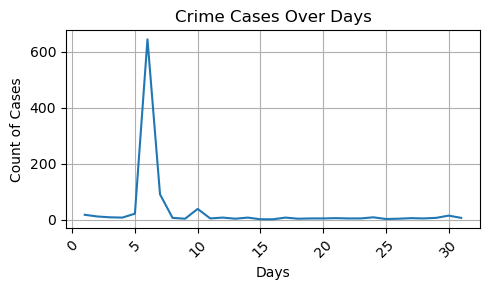

In [108]:
# day
case_count = df2.groupby(['Day'])['Case Number'].count()

plt.figure(figsize=(5,3))
plt.plot(case_count)
plt.xlabel('Days')
plt.ylabel('Count of Cases')
plt.title('Crime Cases Over Days') 
plt.xticks(rotation=45)
plt.grid(True) 
plt.tight_layout() 
plt.show()

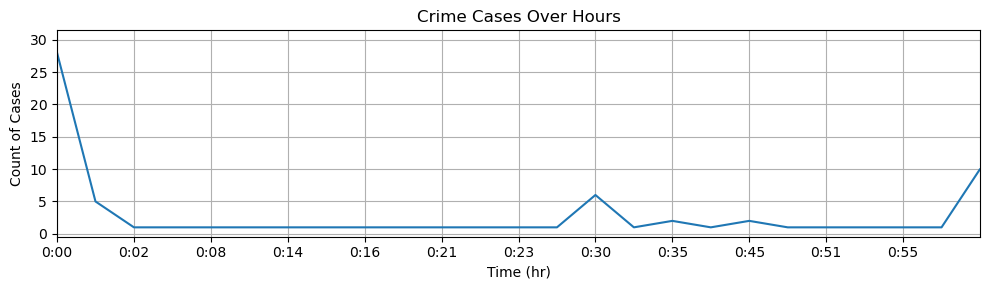

In [109]:
# Peak Crime Hour
case_count = df2.groupby(['Time'])['Case Number'].count()

plt.figure(figsize=(10,3))
plt.plot(case_count)
plt.xlabel('Time (hr)')
plt.ylabel('Count of Cases')
plt.title('Crime Cases Over Hours') 
plt.xlim(2, 24)
# plt.xticks(rotation=45)
plt.xticks(range(0, 24, 2))  # Set ticks every 2 hours
plt.grid(True) 
plt.tight_layout() 
plt.show()

## 5.2 Geospatial Analysis

In [110]:
# Crime hotspots
# Create a base map centered around a specific location (optional)
m = folium.Map(location=[df2['Latitude'].mean(), df2['Longitude'].mean()], zoom_start=13)

# Add circle markers for each crime location
for i, row in df2.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=5,  # Adjust marker size
                        popup=f"""Location: {row["Location Description"]} \n
                                Crime Type: {row['Primary Type']}"""  
                        ).add_to(m)

# Display the map
m

In [111]:
# Load Chicago boundary and ward boundaries
ward_boundaries = gpd.read_file("Data/Boundaries - Wards (2015-2023).geojson")
city_boundary = gpd.read_file("Data/City_Boundary_20240610.geojson")

# Create the base map
m = folium.Map(location=[df2['Latitude'].mean(), df2['Longitude'].mean()], zoom_start=12)

# Add map
ward_geojson = ward_boundaries.to_json()
folium.GeoJson(data=ward_geojson,
                name='Chicago Wards',
                style_function=lambda feature: {'color': 'green'} 
                ).add_to(m)

city_geojson = city_boundary.to_json()
folium.GeoJson(data=city_geojson,
                name='Chicago',
                style_function=lambda feature: {'color': 'gray'} 
                ).add_to(m)

# Add circle markers for each crime location
for i, row in df2.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=5,  # Adjust marker size
                        popup=f"""Location: {row["Location Description"]} \n
                                Crime Type: {row['Primary Type']}"""  
                        ).add_to(m)

# Display the map
m

## 5.3 Crime Type Analysis

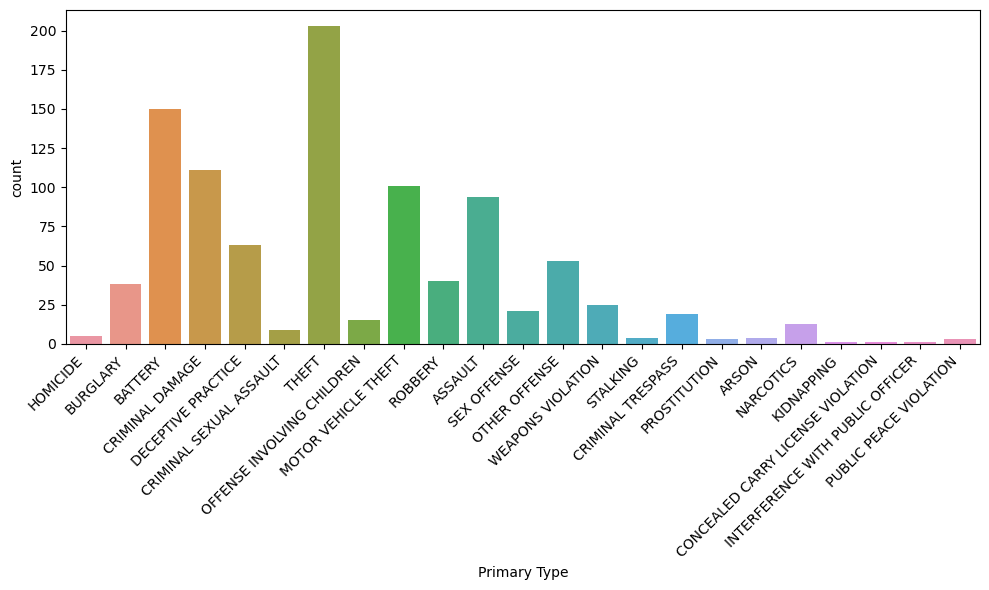

In [119]:
# Distribution of crime type
plt.figure(figsize= (10, 6))
sns.countplot(x= df2["Primary Type"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

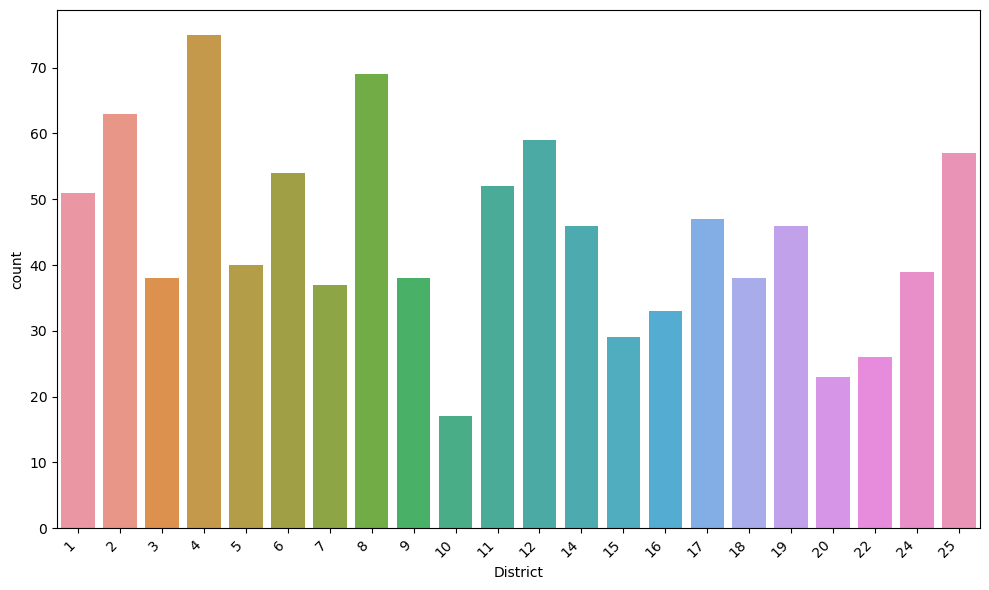

In [121]:
# District-wise
plt.figure(figsize= (10, 6))
sns.countplot(x= df2["District"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

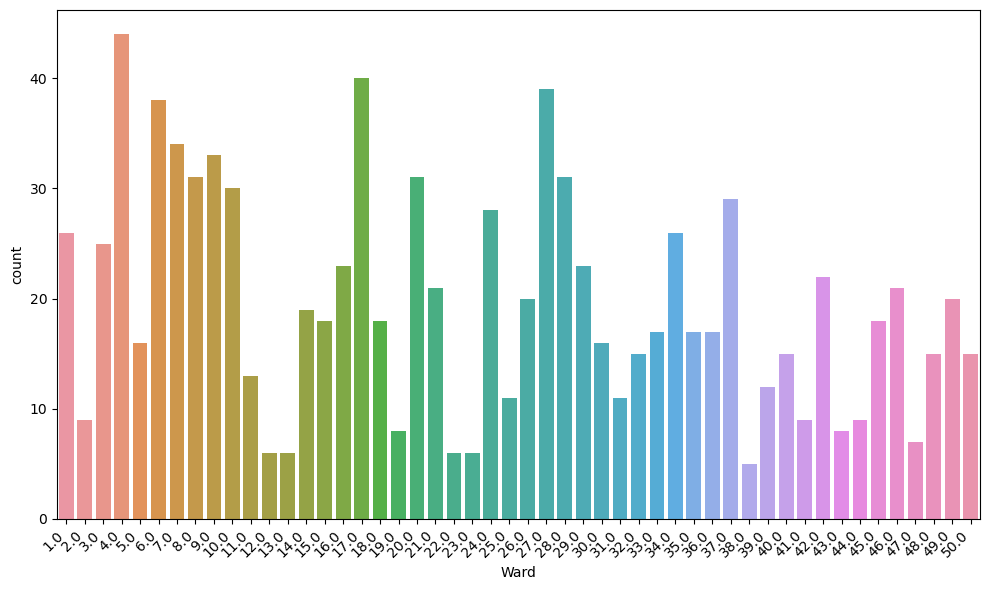

In [122]:
# Ward-wise
plt.figure(figsize= (10, 6))
sns.countplot(x= df2["Ward"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

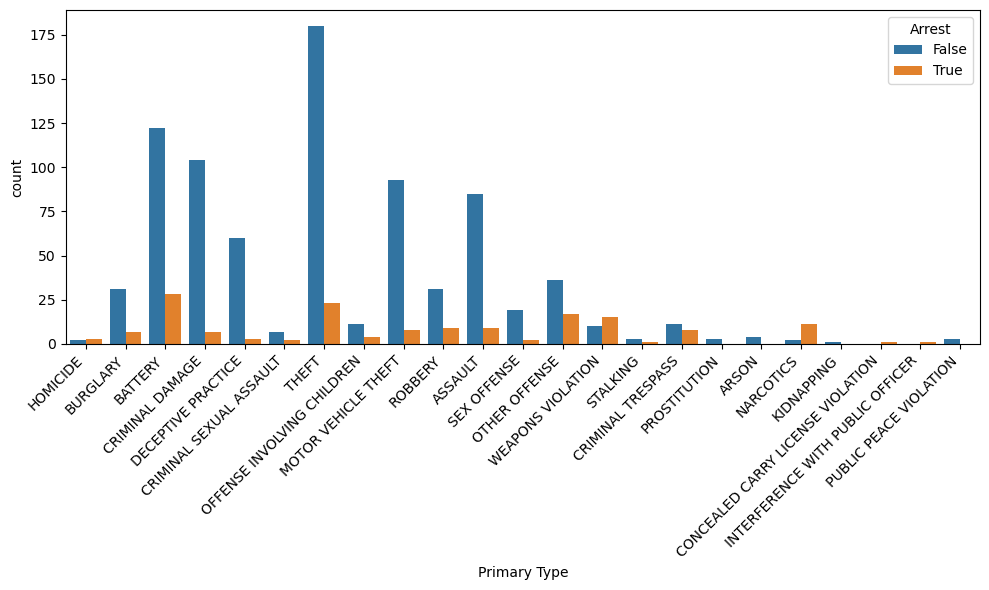

In [127]:
# Severity Vs Less-Severity 
plt.figure(figsize= (10, 6))
sns.countplot(x='Primary Type', hue='Arrest', data=df2)  
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

## 5.4 Arrest and Domestic Incident Analysis

In [129]:
# Arrest rate w.r.t Crime Type
# Calculate arrest rate using groupby
arrest_rates = df2.groupby('Primary Type')['Arrest'].mean()

# Create a bar chart using plotly.express
fig = bar(arrest_rates.reset_index(), x='Primary Type', y='Arrest')  # Reset index for plotting

# Update plot title and labels
fig.update_layout(title='Arrest Rate per Crime Type', xaxis_title='Crime Type', yaxis_title='Arrest Rate')

# Display the plot
fig.show()

In [131]:
# Arrest rate w.r.t Location
# Calculate arrest rate using groupby
arrest_rates = df2.groupby('Location Description')['Arrest'].mean()

# Create a bar chart using plotly.express
fig = bar(arrest_rates.reset_index(), x='Location Description', y='Arrest')  # Reset index for plotting

# Update plot title and labels
fig.update_layout(title='Arrest Rate per Location', xaxis_title='Location', yaxis_title='Arrest Rate')
fig.update_layout(xaxis_tickangle=45, xaxis_tickfont_size=10)

# Display the plot
fig.show()

In [137]:
# Arrest rate w.r.t Time
# Calculate arrest rate using groupby
arrest_rates = df2.groupby('Time')['Arrest'].mean()

# Create a bar chart using plotly.express
fig = bar(arrest_rates.reset_index().sort_values(by='Time', ascending=True), x='Time', y='Arrest')  

# Update plot title and labels
fig.update_layout(title='Arrest Rate per Time', xaxis_title='Time', yaxis_title='Arrest Rate')
fig.update_layout(xaxis_tickangle=45, xaxis_tickfont_size=10)
fig.update_layout(xaxis=dict(dtick=10))

# Display the plot
fig.show()

In [138]:
# Domestic vs Non-Domestic frequency
# Calculate arrest rates for domestic and non-domestic crimes
domestic_arrest_rate = df2[df2['Domestic'] == True]['Arrest'].mean()
non_domestic_arrest_rate = df2[df2['Domestic'] == False]['Arrest'].mean()

# Create a bar chart using plotly.express
fig = bar(x=['Domestic', 'Non-Domestic'], y=[domestic_arrest_rate, non_domestic_arrest_rate])

# Update layout (title, labels)
fig.update_layout(title='Arrest Rate by Domestic Violence Involvement',
                  xaxis_title='Domestic Violence Involvement', yaxis_title='Arrest Rate')

# Display the plot
fig.show()

## 5.5 Location-Specific Analysis

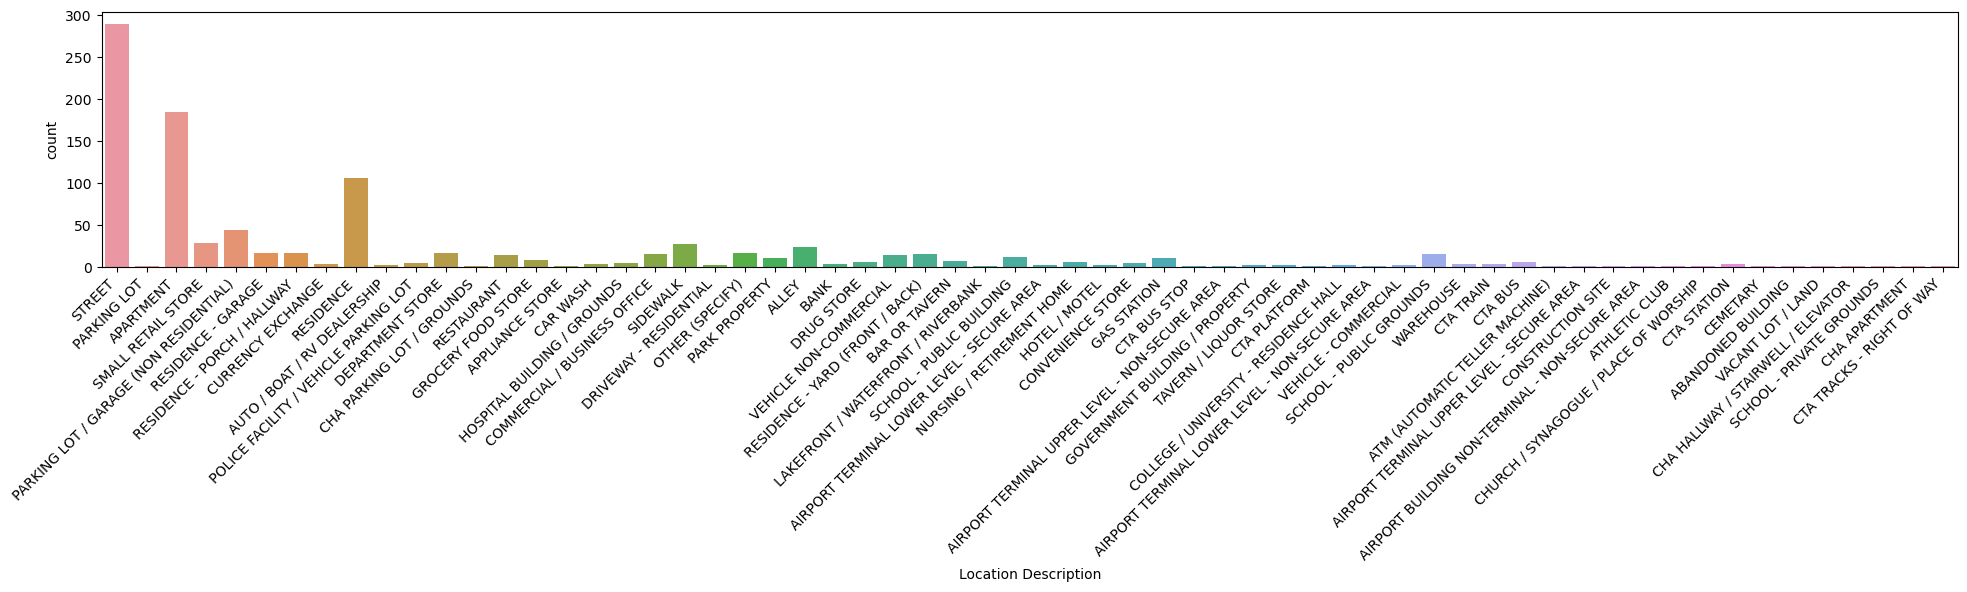

In [141]:
# Location
plt.figure(figsize= (20, 6))
sns.countplot(x= df2["Location Description"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

## 5.6 Seasonal & Weather Impact

In [146]:
# Group data by Month (or Season) and Crime Type
crime_counts = df2.groupby(['Month', 'Primary Type'])['Date'].count().unstack()

# crime_counts is now a DataFrame with Month/Season as index
# and Crime Type as columns, containing crime counts for each combination

# Create the heatmap using plotly.express
crime_heatmap = px.imshow(crime_counts, 
                            x=crime_counts.columns,  # Crime Types from columns
                            y=crime_counts.index,     # Month/Season from index
                            # z=crime_counts.values,     # Crime count values
                            color_continuous_scale='viridis')

# Update layout (title, labels) using plotly.express functions
crime_heatmap.show()